In [1]:
import pandas as pd
import json,os
import numpy as np
import matplotlib as plt
import seaborn as sns


In [2]:
#creo la variable "sales"
sales_dta=pd.read_csv('sales-forecasting.csv')

In [3]:
#Reviso los encabezados
sales_dta.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Buscar ventas por tipo de envío: Pandas Plot
# Find Sales By Shipping Type: Pandas Plot

In [6]:
# variable creada "ax"
# sales_dta.loc[:,['Ship Mode','Sales']] -> Columnas -> Ship mode, Sales
# groupby('Ship Mode').sum() -> Agrupo por ship Mode
#sort_values('Sales',ascending=False)-> Ordeno de forma descendente

ax_=sales_dta.loc[:,['Ship Mode','Sales']].\
groupby('Ship Mode').sum().\
sort_values('Sales',ascending=False)

#Muestro las columnas
ax_.columns

#son las ventas 

Index(['Sales'], dtype='object')

In [7]:
# variable creada "ax"
# sales_dta.loc[:,['Ship Mode','Sales']] -> Columnas -> Ship mode, Sales
# groupby('Ship Mode').sum() -> Agrupo por ship Mode
#sort_values('Sales',ascending=False)-> Ordeno de forma descendente

ax_=sales_dta.loc[:,['Ship Mode','Sales']].\
groupby('Ship Mode').sum().\
sort_values('Sales',ascending=False)

#Muestro las filas
ax_.index

#Indica que elementos existen en la fila, de forma unica

Index(['Standard Class', 'Second Class', 'First Class', 'Same Day'], dtype='object', name='Ship Mode')

,Sales
Ship Mode,
Standard Class,1.340831e+06
Second Class,4.499142e+05
First Class,3.455723e+05
Same Day,1.252190e+05


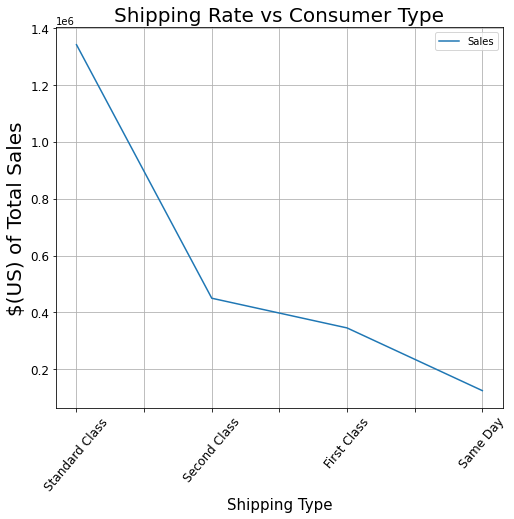

In [4]:
#selecciono la columna "Ship Mode", "Sales"
# Ship Mode -> forma de envio
# Sales-> venta
#groupby('Ship Mode') -> creo un grupo por tipo de envio
# sort_values('Sales',ascending=False) -> ordeno de forma descendente las ventas (Mayor a Menor)
# plot( ) -> terminando la tabla -> Grafico 

ax_=sales_dta.loc[:,['Ship Mode','Sales']].\
groupby('Ship Mode').sum().\
sort_values('Sales',ascending=False).\
plot(fontsize=12,figsize=(8,7),rot=50)

# plot( ) -> Grafico 
# fontsize=12, -> tamaño de la fuente (letra)
# figsize=(8,7) -> tamaño de la figura
# ,rot=50 -> 50 grados

# titulo de las columnas
# fontsize=15 -> tamaño de la letra
ax_.set_xlabel("Shipping Type",fontsize=15)
ax_.grid()

#titulo de las filas
# fontsize=20 -> tamaño de la letra
ax_.set_ylabel("$(US) of Total Sales",fontsize=20)

# titulo del grafico
# fontsize=20 -> tamaño de la letra
ax_.set_title('Shipping Rate vs Consumer Type',fontsize=20) 

# Imprimo la tabla nuevamente para poder verla
# sin usar plot()
sales_dta.loc[:,['Ship Mode','Sales']].\
groupby('Ship Mode').sum().sort_values('Sales',
ascending=False)


,sum,count
Ship Mode,,
Standard Class,1.340831e+06,5859
Second Class,4.499142e+05,1902
First Class,3.455723e+05,1501
Same Day,1.252190e+05,538


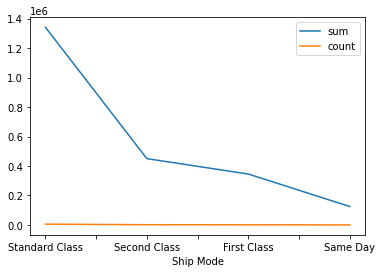

In [7]:
#sales_dta.loc[:,['Ship Mode','Sales']] -> columna 'Ship Mode','Sales'
# groupby('Ship Mode')['Sales'] -> agrupa 'Ship Mode', pero analiza los valores de 'sales'     -> fila 'ship mode', columna 'sales' 
# agg(['sum','count']) -> agrega suma y contar -> para las ventas
#sort_values('sum', ascending=False) -> segun 'sum', de forma descendente (mayor a menor)
# .plot()  -> graficalo

sales_dta.loc[:,['Ship Mode','Sales']].\
groupby('Ship Mode')['Sales'].agg(['sum','count']).sort_values('sum',
                                                    ascending=False).plot()

#¿Que tipo de envio tiene más venta y cuantas personas lo estan usando?
# Standard Class Venta: 1.340831e+06 , personas lo usan: 5859
# Same Day venta: 1.252190e+05, personas lo usan: 538



#Imprimo la tabla
# sin usar plot()
sales_dta.loc[:,['Ship Mode','Sales']].\
groupby('Ship Mode')['Sales'].agg(['sum','count']).sort_values('sum',
                                                    ascending=False)

# Pandas Plot: Shipping Type vvs QTY w/ Sub Plots
# Pandas Plot: Tipo de Envio vs Cantidad Con/ Sub Plots

In [10]:
#Graficaremos lo anterior, pero usaremos agregados

#Segment -> segmento de clientes
#Ship Mode -> tipo de envio
# sales_dta.groupby(['Segment', 'Ship Mode']) ->     Agarro las columnas 'Segment', 'Ship Mode'
# Segment.agg([len]) -> cuento el largo de la columna ¿cuantas filas tiene?
# .unstack() -> desapilo la tabla creada (en vez de tenerla en 1 fila, la desarmo y tengo más manejo)


sales_dta.groupby(['Segment', 'Ship Mode']).Segment.agg([len])



len
Segment     Ship Mode           
Consumer    First Class      755
            Same Day         312
            Second Class    1003
            Standard Class  3031
Corporate   First Class      468
            Same Day         114
            Second Class     589
            Standard Class  1782
Home Office First Class      278
            Same Day         112
            Second Class     310
            Standard Class  1046

In [9]:
#Graficaremos lo anterior, pero usaremos agregados

#Segment -> segmento de clientes
#Ship Mode -> tipo de envio
# sales_dta.groupby(['Segment', 'Ship Mode']) ->     Agarro las columnas 'Segment', 'Ship Mode'
# Segment.agg([len]) -> cuento el largo de la columna ¿cuantas filas tiene?
# .unstack() -> desapilo la tabla creada (en vez de tenerla en 1 fila, la desarmo y tengo más manejo)


sales_dta.groupby(['Segment', 'Ship Mode']).Segment.agg([len]).unstack()



len                                     
Ship Mode   First Class Same Day Second Class Standard Class
Segment                                                     
Consumer            755      312         1003           3031
Corporate           468      114          589           1782
Home Office         278      112          310           1046

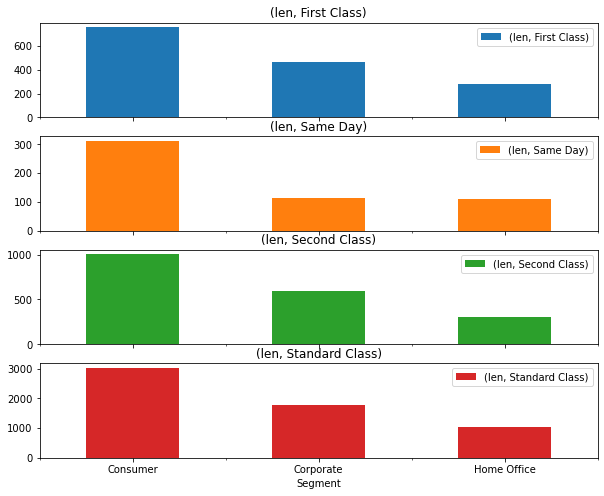

In [12]:
# Graficaremos lo anterior, pero usaremos agregados
# Muestre en diferentes graficos por tipo de envio la cantidad por segmento 
# el segmento se utiliza como valor numerico
# el segmento es una variable string


#Segment -> segmento de clientes
#Ship Mode -> tipo de envio
# sales_dta.groupby(['Segment', 'Ship Mode']) ->     Agarro las columnas 'Segment', 'Ship Mode'
# Segment.agg([len]) -> cuento el largo de la columna ¿cuantas filas tiene?
# .unstack() -> desapilo la tabla creada (en vez de tenerla en 1 fila, la desarmo y tengo más manejo)


# plot(kind='bar', subplots=True -> grafico, usando subgrafico de barras

# plot() -> grafico la tabla
# kind='bar',       -> tipo de grafico: Barra
# subplots=True,    -> subgraficos
# figsize=(10,8),  -> tamaño figura
# rot=0)           -> angulo 0 (que no este inclinado las barras)


sales_dta.groupby(['Segment', 'Ship Mode']).Segment.agg([len]).unstack().\
plot(kind='bar', subplots=True,figsize=(10,8),rot=0)



Text(0.5, 1.0, 'Shipping rate vs consumer type')

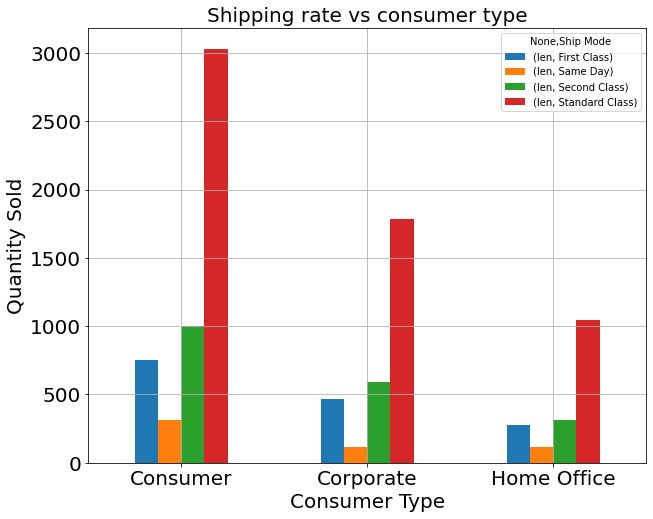

In [11]:

# Compare en un grafico, las ventas segun tipo de segmento
# el segmento se utiliza como valor numerico
# el segmento es una variable string



#Segment -> segmento de clientes
#Ship Mode -> tipo de envio
# sales_dta.groupby(['Segment', 'Ship Mode']) ->     Agarro las columnas 'Segment', 'Ship Mode'
# Segment.agg([len]) -> cuento el largo de la columna ¿cuantas filas tiene?
# .unstack() -> desapilo la tabla creada (en vez de tenerla en 1 fila, la desarmo y tengo más manejo)

#plot.bar -> histograma
# rot=0,           -> 0 angulo
# figsize=(10,8),  -> tamaño figura
# fontsize=20      -> tamaño letra

ax=sales_dta.groupby(['Segment', 'Ship Mode']).Segment.agg([len]).unstack().\
plot.bar(rot=0,figsize=(10,8),fontsize=20)



#lineas
ax.grid()

# titulo de las columnas
# fontsize=20 -> tamaño de la letra
ax.set_xlabel("Consumer Type",fontsize=20)

# titulo de las filas
# fontsize=20 -> tamaño de la letra
ax.set_ylabel("Quantity Sold",fontsize=20)

# titulo del grafico
# fontsize=20 -> tamaño de la letra
ax.set_title('Shipping rate vs consumer type',fontsize=20)

# Sub Category Sales in (US):
# Sub Categoria de Ventas en (US):

Text(0.5, 1.0, 'Item Type Sold in $(US)')

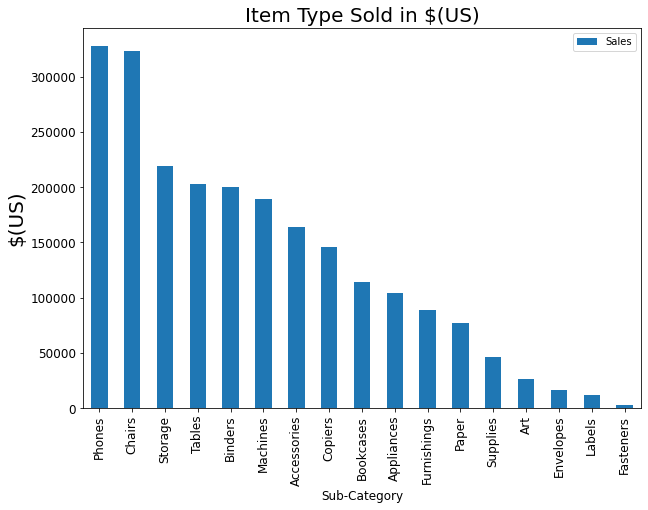

In [11]:
# Grafique las ventas de los productos (Muestre los mejores y peores productos de forma ordenada)


# a = nueva variable para el grafico
# sales_dta[['Sub-Category','Sales']] -> agarra las columnas 'subcategory', 'sales' 
# groupby('Sub-Category').sum()  -> agrupa por subcategoria
# sort_values('Sales',ascending=False) -> sales de forma descendente
# plot(kind='bar',figsize=(10,7),fontsize=12) -> grafica, grafico de barras, tamaño figura 10-7, tamaño letra 12

a_=sales_dta[['Sub-Category','Sales']].groupby('Sub-Category').sum().\
sort_values('Sales',ascending=False).plot(kind='bar',figsize=(10,7),fontsize=12)

# titulo de las columnas
# fontsize=12 -> tamaño de la letra
a_.set_xlabel('Sub-Category',fontsize=12)

# titulo de la fila
# fontsize=20 -> tamaño de la letra
a_.set_ylabel("$(US)",fontsize=20)

# titulo del grafico
# fontsize=20 -> tamaño de la letra
a_.set_title('Item Type Sold in $(US)',fontsize=20) 


# `Crosstab`

+ no necesitamos un marco de datos, podemos usar matrices / listas en su lugar
+ puede normalizar sus datos

In [13]:
#Creamos una matriz de datos "customer_name"
customer_name=np.array(sales_dta['Customer Name'].to_list())

#Creamos una matriz de datos "sales_tots"
sales_tots=np.array(sales_dta['Sales'].to_list())

#Creamos una matriz de datos "sub_category"
sub_category=np.array(sales_dta['Sub-Category'].to_list())



In [14]:
#Muestro la matriz 'sub_category'
sub_category


array(['Bookcases', 'Chairs', 'Labels', ..., 'Phones', 'Phones',
       'Accessories'], dtype='<U11')

In [15]:
# Cruzo los datos
# matriz customer_name y matriz subcategory (muestra 5 filas)
pd.crosstab(customer_name,sub_category)[:5]


# .plot.bar(stacked=True)
# pd.crosstab(sales_tots,sub_category,normalize='index')

col_0,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
row_0,,,,,,,,,,,,,,,,,
Aaron Bergman,0,0,1,0,1,1,0,0,0,0,0,0,0,1,2,0,0
Aaron Hawkins,1,0,1,2,0,1,0,1,0,1,1,0,1,1,1,0,0
Aaron Smayling,0,0,0,3,1,0,0,0,0,0,0,2,2,0,1,0,1
Adam Bellavance,3,1,0,3,0,1,0,0,0,1,0,0,7,0,0,1,1
Adam Hart,1,1,2,2,0,1,0,0,1,3,1,0,4,0,0,2,2


In [13]:
#Mostrar un detalle de 10 filas la cantidad de los productos que compraron los clientes


# sales_dta.loc[:,['Customer Name','Sub-Category','Sales']] -> todas las filas, con las columnas 'Customer Name','Sub-Category','Sales'
# groupby(['Customer Name','Sub-Category']).count()[:10] -> agrupa por nombre y producto - solo 10 filas

sales_dta.loc[:,['Customer Name','Sub-Category','Sales']].\
groupby(['Customer Name','Sub-Category']).count()[:10]

Sales
Customer Name Sub-Category       
Aaron Bergman Art               1
              Bookcases         1
              Chairs            1
              Phones            1
              Storage           2
Aaron Hawkins Accessories       1
              Art               1
              Binders           2
              Chairs            1
              Envelopes         1

In [14]:
# index=sales_dta['Customer Name'] -> fila
# columns=sales_dta['Sub-Category' -> columna
# values=sales_dta['Sales'] -> valor numerico para analizar
# margins=True,  -> crea los totales en fila y columna
# aggfunc='sum' -> funcion suma -> sumara todo

pd.crosstab(index=sales_dta['Customer Name'],
columns=sales_dta['Sub-Category'], 
values=sales_dta['Sales'], margins=True, aggfunc='sum')[:5]

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
Customer Name,,,,,,,,,,,,,,,,,,
Aaron Bergman,NaN,NaN,17.940,NaN,341.960,48.712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.98,255.564,NaN,NaN,886.156
Aaron Hawkins,34.77,NaN,18.704,59.320,NaN,279.456,NaN,247.84,NaN,86.45,18.90,NaN,8.000,668.16,323.100,NaN,NaN,1744.700
Aaron Smayling,NaN,NaN,NaN,132.588,477.666,NaN,NaN,NaN,NaN,NaN,NaN,2135.682,102.068,NaN,31.400,NaN,171.288,3050.692
Adam Bellavance,195.74,160.32,NaN,4404.216,NaN,449.568,NaN,NaN,NaN,127.88,NaN,NaN,353.106,NaN,NaN,27.930,2036.860,7755.620
Adam Hart,165.60,2.22,15.848,850.163,NaN,314.352,NaN,NaN,17.9,442.13,5.22,NaN,135.648,NaN,NaN,422.616,878.640,3250.337


In [15]:
FL=sales_dta[sales_dta['State']=='Florida']
FL.loc[:,['City','Sales','Sub-Category']]

pd.crosstab(index=[FL['City']], 
columns=FL['Sub-Category'], margins=True)[:5]

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables,All
City,,,,,,,,,,,,,,,,,,
Apopka,0,1,0,3,0,0,0,1,1,1,0,0,0,0,0,0,0,7
Boca Raton,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3
Boynton Beach,0,0,1,1,0,1,0,0,0,3,2,0,2,0,0,0,0,10
Coral Gables,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2
Coral Springs,0,2,0,0,1,0,0,0,0,2,1,0,1,0,1,0,0,8


# CrossTab Plot:           Florida Cities by Qty of Sub-Cateogory Sold
# Grafico Tablas Cruzadas: ciudades de Florida por cantidad de subcategoria Vendida


Text(0.5, 1.0, 'Item Type Sold by Cities in (FL)')

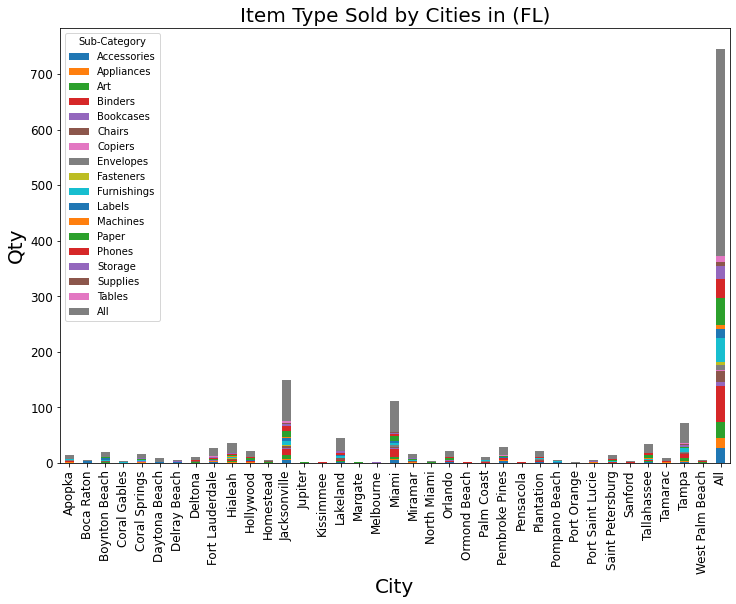

In [16]:
<#Cuantas ventas hay en todas las ciudades de Florida

aq=pd.crosstab(index=[FL['City']], 
columns=FL['Sub-Category'], margins=True).\
plot.bar(stacked=True,figsize=(12,8),fontsize=12)


aq.set_xlabel('City',fontsize=20)

aq.set_ylabel("Qty",fontsize=20)
aq.set_title('Item Type Sold by Cities in (FL)',fontsize=20)

# Pivot Tables:

In [17]:
# ventas medias por estado y ciudad:
state_city_Sales=sales_dta.loc[:,['State','City','Sales']]


pd.pivot_table(state_city_Sales,
index=['State', 'City'], values='Sales', aggfunc='mean')

Sales
State     City                   
Alabama   Auburn       294.471667
          Decatur      259.601538
          Florence     399.470000
          Hoover       131.462500
          Huntsville   248.437000
...                           ...
Wisconsin Superior     144.414444
          Waukesha      54.500000
          Wausau        79.370000
          West Allis   125.240000
Wyoming   Cheyenne    1603.136000

[600 rows x 1 columns]

In [18]:
#Columna State solamente 'Florida'
FL=sales_dta[sales_dta['State']=='Florida']

#Solo estas columnas 'City','Sales','Sub-Category'
FL.loc[:,['City','Sales','Sub-Category']]

,City,Sales,Sub-Category
3,Fort Lauderdale,957.5775,Tables
4,Fort Lauderdale,22.3680,Storage
43,Melbourne,95.6160,Storage
231,Tampa,233.8600,Tables
232,Tampa,620.6145,Tables
...,...,...,...
9567,Tampa,4.0320,Art
9585,Miami,31.0080,Paper
9769,Hialeah,339.9200,Bookcases
9770,Hialeah,10.5280,Paper


In [19]:
# ¿Cual es el promedio de las ventas de todos los productos de cada ciudad de Florida?

# Fila 'City', 'Sub-Category'
# Valores 'sales'
# funcion promedio -> calcula el promedio de las ventas
pd.pivot_table(FL, 
               index=['City', 'Sub-Category'], values='Sales', aggfunc='mean')


Sales
City            Sub-Category           
Apopka          Appliances    671.54400
                Binders        13.28600
                Envelopes      48.94400
                Fasteners      14.32000
                Furnishings   129.88800
...                                 ...
Tampa           Supplies       41.37600
                Tables        427.23725
West Palm Beach Art            13.12000
                Paper          72.22400
                Phones         55.98400

[185 rows x 1 columns]

# Use Pivot Table to Plot: City means sales in FL
# Usar tabla pivote para Graficar: Promedio en ventas en la Ciudad en FL (Estado de Florida)

Text(0.5, 1.0, 'Tipo de Venta en la ciudad en (FL)')

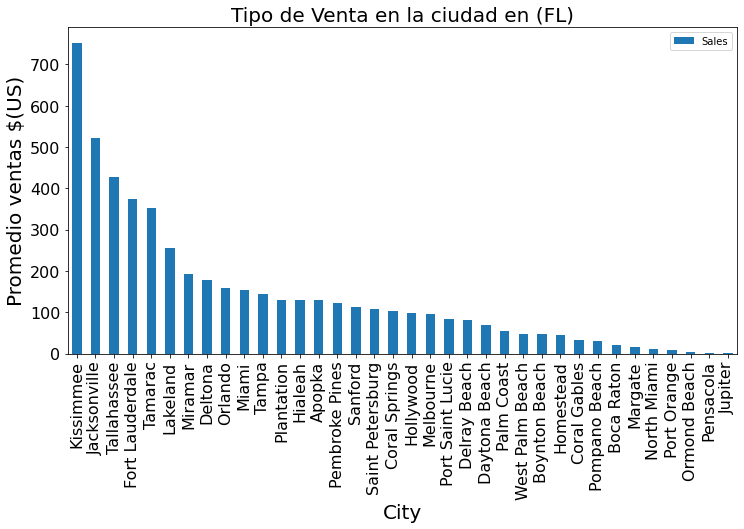

In [23]:
#Grafique el promedio de las ventas de las ciudades de Florida, de Maximo a minimo

# Fila: ['City']
# valores: 'Sales'
# funcion promedio - calcula promedio de las ventas
# de forma descendente
# tipo grafico : bar -> barra
# figsize=(12,6), - tamaño figura 12 altura x 6 ancho
# fontsize=16, tamaño barra 16
# rot=90 - angulo de 90ª

aq_=pd.pivot_table(FL,
index=['City'], values='Sales', aggfunc='mean').\
sort_values('Sales',ascending=False).\
plot(kind='bar',figsize=(12,6),fontsize=16,rot=90)

#Etiquetas
aq_.set_xlabel('City',fontsize=20)
aq_.set_ylabel("Promedio ventas $(US)",fontsize=20)
aq_.set_title('Tipo de Venta en la ciudad en (FL)',fontsize=20) 